# 混合モデルと近似推論
https://www.amazon.co.jp/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%B9%E3%82%BF%E3%83%BC%E3%83%88%E3%82%A2%E3%83%83%E3%83%97%E3%82%B7%E3%83%AA%E3%83%BC%E3%82%BA-%E3%83%99%E3%82%A4%E3%82%BA%E6%8E%A8%E8%AB%96%E3%81%AB%E3%82%88%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E5%85%A5%E9%96%80-KS%E6%83%85%E5%A0%B1%E7%A7%91%E5%AD%A6%E5%B0%82%E9%96%80%E6%9B%B8-%E9%A0%88%E5%B1%B1-%E6%95%A6%E5%BF%97/dp/4061538322/ref=pd_lpo_sccl_1/357-1883824-8378404?pd_rd_w=Ppwn7&content-id=amzn1.sym.d769922e-188a-40cc-a180-3315f856e8d6&pf_rd_p=d769922e-188a-40cc-a180-3315f856e8d6&pf_rd_r=FZTFK68376X7D0ZJN3CH&pd_rd_wg=26Ise&pd_rd_r=8eec0c7c-9e68-456c-977b-39077482792c&pd_rd_i=4061538322&psc=1

## 図1.4　ガウス混合モデルによるクラスタリング
### データの生成過程
データを表現するためのモデルを構築するためには，「観測されたデータ点1つ１つがどの様な過程で生成されるのか」を具体的に想定する必要があります．

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

In [48]:
a = np.array([1, 2, 3])
np.random.choice(a, size=2, replace = False, p=[0.1, 0.8, 0.1])

array([2, 3])

In [49]:
np.random.choice(a, size=100, replace = True, p=[0.4, 0.3, 0.3])

array([2, 2, 1, 3, 1, 3, 3, 2, 1, 3, 3, 2, 1, 1, 3, 3, 1, 3, 1, 3, 2, 2,
       1, 3, 1, 3, 3, 3, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3,
       3, 1, 2, 3, 3, 2, 1, 2, 1, 1, 3, 1, 2, 1, 3, 3, 1, 3, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 3, 3, 1, 3, 1, 2, 3, 1, 2, 3, 1, 1,
       2, 2, 3, 3, 1, 1, 2, 2, 3, 2, 1, 1])

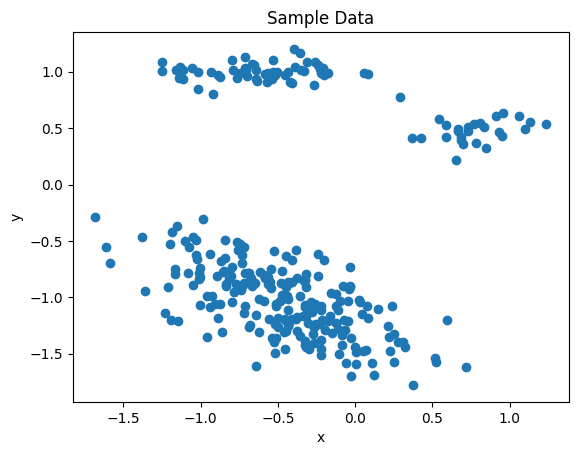

In [50]:
np.random.seed(0)

# パラメータの設定
num_samples = 300
# クラスタの数
num_clusters = 3
# 混合比率
weights = [0.7, 0.1, 0.2]
# それぞれのクラスタに対するパラメータの設定
means = [[-0.5, -1.0], [0.8, 0.5], [-0.5, 1.0]]
covariances = [[[0.20, -0.1], [-0.1, 0.10]],
               [[0.05, 0], [0, 0.01]],
               [[0.1, 0], [0, 0.01]]]

# クラスタ番号をサンプリング
cluster_indices = np.random.choice(num_clusters, size=num_samples, p=weights)

# 各クラスタからデータを生成
samples = []
for idx in cluster_indices:
    # クラスタに対するガウス乱数を生成
    sample = np.random.multivariate_normal(means[idx], covariances[idx])
    samples.append(sample)

samples = np.array(samples)

# データの可視化
plt.scatter(samples[:, 0], samples[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample Data')
plt.show()

## 図4.1　単一のガウス分布による表現
### 単一のガウス分布と仮定し推定

In [51]:
# パラメータの推定
estimated_mean = np.mean(samples, axis=0)
estimated_cov = np.cov(samples.T)
print('estimated mean: ', estimated_mean)
print('estimated covariance: ', estimated_cov)

estimated mean:  [-0.38621512 -0.50911379]
estimated covariance:  [[0.28890824 0.01249126]
 [0.01249126 0.80158651]]


/tmp/ipykernel_337385/2767591818.py:8: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x, y, estimated_pdf, levels=5, colors='r', alpha=0.5, label='Estimated Gaussian')


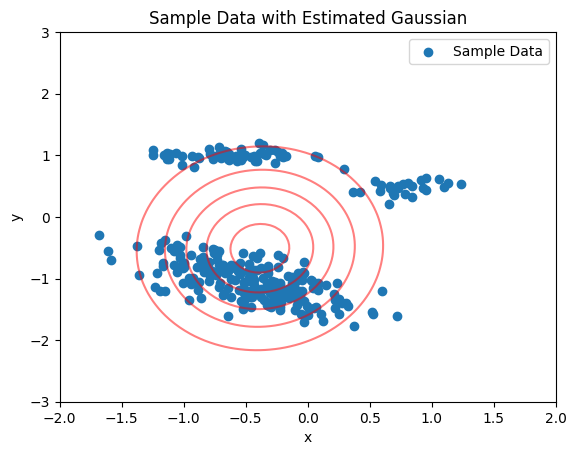

In [52]:
# 推定したガウス分布のメッシュグリッド
x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-3, 3, 100))
pos = np.dstack((x, y))
estimated_pdf = multivariate_normal.pdf(pos, estimated_mean, estimated_cov)

# データと推定したガウス分布の可視化
plt.scatter(samples[:, 0], samples[:, 1], label='Sample Data')
plt.contour(x, y, estimated_pdf, levels=5, colors='r', alpha=0.5, label='Estimated Gaussian')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample Data with Estimated Gaussian')
plt.legend()
plt.show()